In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import itertools

from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from matplotlib import pyplot as plt


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.layers import Activation, Dense, LeakyReLU # Type of layers


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix





2021-09-09 14:53:40.197173: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'libcudart.so.10.1'; dlerror: libcudart.so.10.1: cannot open shared object file: No such file or directory
2021-09-09 14:53:40.197196: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
url = "https://raw.githubusercontent.com/becodeorg/GNT-Arai-2.31/master/content/additional_resources/datasets/Wine%20Quality/wine.csv?token=AUDYSCOBCKJXVFIIH6ZCD4TBIBH2E"
df = pd.read_csv(url)
df = df.drop_duplicates()
df = df.iloc[: , 1:]

num_list = [0,1,2,3,4,5,6,7,8,9,10]
for number in num_list:
    if number < 6:
        df['quality'] = df['quality'].replace([number],0)
    else:
        df['quality'] = df['quality'].replace([number],1)
  
print(df['quality'].value_counts())



# for column in df.columns:
#     df[column] = df[column]  / df[column].abs().max()
# print(df.head())

# df.head()
df.info()
# df.shape



1    4113
0    2384
Name: quality, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 659.9 KB


In [3]:
# # sns.pairplot(df[["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol","quality"]], diag_kind='kde')
# # plot pairplot
# sns.pairplot(df)
# #show graph
# plt.show()

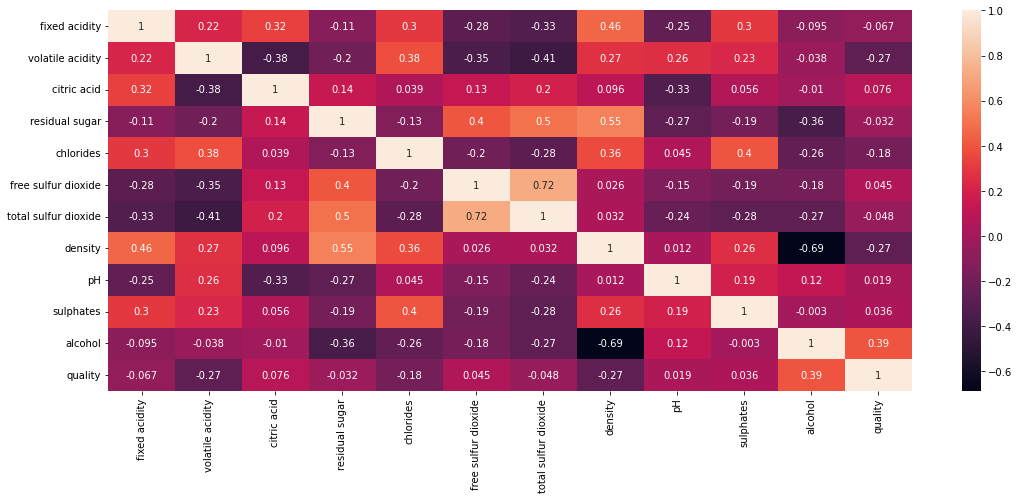

<Figure size 432x288 with 0 Axes>

In [5]:
# correlation by visualization
plt.figure(figsize=[18,7])
# plot correlation
sns.heatmap(df.corr(),annot=True)
plt.show()
plt.savefig('visuals/hmfrees.png')

In [6]:
colm = []
# loop for columns
for i in range(len(df.corr().keys())):
# loop for rows
  for j in range(i):
    if abs(df.corr().iloc[i,j]) > 0.7:
      colm = df.corr().columns[i]
print(colm)

total sulfur dioxide


In [7]:
df = df.drop('total sulfur dioxide',axis = 1)
df.update(df.fillna(df.mean()))

In [94]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6497.0,7.215307,1.296434,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6497.0,0.339666,0.164636,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6497.0,0.318633,0.145318,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6497.0,5.443235,4.757804,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6497.0,0.056034,0.035034,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,3.218501,0.160787,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6497.0,0.531268,0.148806,0.22000,0.43000,0.51000,0.60000,2.00000
alcohol,6497.0,10.491801,1.192712,8.00000,9.50000,10.30000,11.30000,14.90000


In [8]:



x_log = np.log(df["total sulfur dioxide"].copy()) 
x_square_root = np.sqrt(df["total sulfur dioxide"].copy())
x_boxcox, _ = stats.boxcox(df["total sulfur dioxide"].copy())
x = df["total sulfur dioxide"].copy()


fig = make_subplots(rows=2, cols=2,
                    horizontal_spacing=0.125,
                    vertical_spacing=0.125,
                    subplot_titles=("Original Data",
                                    "Log Transformation",
                                    "Square root transformation",
                                    "Boxcox Transformation")
                    )
fig.add_traces([
                go.Histogram(x=x,
                             hoverinfo="x",
                             showlegend=False),
                go.Histogram(x=x_log,
                             hoverinfo="x",
                             showlegend=False),
                go.Histogram(x=x_square_root,
                             hoverinfo="x",
                             showlegend=False),                
                go.Histogram(x=x_boxcox,
                             hoverinfo="x",
                             showlegend=False),
               ],
               rows=[1, 1, 2, 2],
               cols=[1, 2, 1, 2]
)
fig.update_layout(
    title=dict(
               text=" total sulfur dioxide",
               font=dict(
                         family="Arial",
                         size=20)),
    showlegend=False,
    width=800,
    height=500)
fig.show() 

KeyError: 'total sulfur dioxide'

In [96]:
# import autofeat
# from autofeat import AutoFeatRegressor
# from sklearn.model_selection import train_test_split

# X = df.drop(['quality'],axis=1).values
# y = df['quality'].values

# X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3,random_state =0)

# model = AutoFeatRegressor()
# df = model.fit_transform(X, y)
# pred = model.predict(X_test)
# print("Final R^2: %.4f" % model.score(df, y))

In [97]:
# plt.figure()
# plt.scatter(model.predict(df), y, s=2)

In [98]:
# from autofeat import AutoFeatClassifier
# from sklearn.datasets import load_wine

# X,y = load_wine(True)
# X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3,random_state =0)

# model = AutoFeatClassifier()
# df = model.fit_transform(X, y)
# y_pred = model.predict(X_test)
# print("Final Accuracy: %.4f" % model.score(df, y))

In [99]:
# model = AutoFeatModel(problem_type='regression')
# df = model.fit_transform(X, y)
# y_pred = model.predict(X_test)
# print("Final R^2: %.4f" % model.score(df, y))

In [100]:
# from AutoFeat import FeatureSelector
# X,y = load_wine(True)
# fsel = FeatureSelector(verbose=1)
# new_X = fsel.fit_transform(pd.DataFrame(X), pd.DataFrame(y))

In [9]:
X = df.drop(['quality'],axis=1).values
y = df['quality'].values

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2, shuffle=True)

scaler_x = MinMaxScaler().fit(X_train)
X_train = scaler_x.transform(X_train)
X_test = scaler_x.transform(X_test)

scaler_y = MinMaxScaler().fit(y_train.reshape(-1,1))
y_train = scaler_y.transform(y_train.reshape(-1,1))
y_test = scaler_y.transform(y_test.reshape(-1,1))



print(X_train.shape,"\n",X_test.shape,"\n", y_train.shape,"\n", y_test.shape)



(5197, 10) 
 (1300, 10) 
 (5197, 1) 
 (1300, 1)


In [10]:
nb_classes = len(pd.unique(df['quality']))
nb_features= X_train.shape[1]
batch_size = 100

In [12]:
model = Sequential()
model.add(Dense(10, input_shape=(10,), activation="relu",kernel_regularizer="l2"))
model.add(Dense(5, activation="sigmoid"))
model.add(Dense(1))

In [13]:
learning_rate = 0.0001
loss = "binary_crossentropy"
# binary_crossentropy

# early_stopping = EarlyStopping(patience = 3)
# ,callbacks =[early_stopping]

model.compile(optimizer="adam",loss=loss, metrics=['accuracy'])
print(model.summary())


quality = model.fit(X_train, y_train, epochs=100, validation_split = 0.2, verbose=2)


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 6         
Total params: 171
Trainable params: 171
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
130/130 - 0s - loss: 1.4326 - accuracy: 0.3714 - val_loss: 1.0193 - val_accuracy: 0.3740
Epoch 2/100
130/130 - 0s - loss: 0.8633 - accuracy: 0.4496 - val_loss: 0.7581 - val_accuracy: 0.6356
Epoch 3/100
130/130 - 0s - loss: 0.7336 - accuracy: 0.6485 - val_loss: 0.7055 - val_accuracy: 0.6558
Epoch 4/100
130/130 - 0s - loss: 0.6994 - accuracy: 0.6548 - val_loss: 0.6762 

Epoch 75/100
130/130 - 0s - loss: 0.5575 - accuracy: 0.7253 - val_loss: 0.5349 - val_accuracy: 0.7413
Epoch 76/100
130/130 - 0s - loss: 0.5569 - accuracy: 0.7270 - val_loss: 0.5342 - val_accuracy: 0.7423
Epoch 77/100
130/130 - 0s - loss: 0.5609 - accuracy: 0.7274 - val_loss: 0.5343 - val_accuracy: 0.7375
Epoch 78/100
130/130 - 0s - loss: 0.5559 - accuracy: 0.7246 - val_loss: 0.5337 - val_accuracy: 0.7413
Epoch 79/100
130/130 - 0s - loss: 0.5580 - accuracy: 0.7255 - val_loss: 0.5328 - val_accuracy: 0.7413
Epoch 80/100
130/130 - 0s - loss: 0.5572 - accuracy: 0.7241 - val_loss: 0.5326 - val_accuracy: 0.7423
Epoch 81/100
130/130 - 0s - loss: 0.5567 - accuracy: 0.7246 - val_loss: 0.5319 - val_accuracy: 0.7375
Epoch 82/100
130/130 - 0s - loss: 0.5544 - accuracy: 0.7267 - val_loss: 0.5307 - val_accuracy: 0.7365
Epoch 83/100
130/130 - 0s - loss: 0.5556 - accuracy: 0.7294 - val_loss: 0.5301 - val_accuracy: 0.7375
Epoch 84/100
130/130 - 0s - loss: 0.5552 - accuracy: 0.7277 - val_loss: 0.5295 - v

In [14]:
predictions = model.predict(X_test)

results = model.evaluate(X_test, y_test)
print(f"\nAccuracy on test set is {results[1]*100:.2f}%")

41/41 [==============================] - 0s 526us/step - loss: 0.5800 - accuracy: 0.7238

Accuracy on test set is 72.38%


In [106]:
model.save("models/v2")

INFO:tensorflow:Assets written to: models/v2/assets


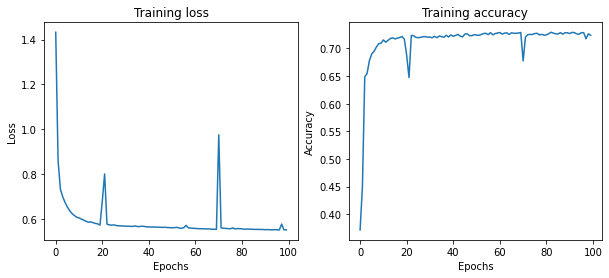

<Figure size 432x288 with 0 Axes>

In [16]:
def plot_loss_accuracy(quality):
    loss = quality.history['loss']
    accuracy = quality.history['accuracy']
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
    axs[0].plot(range(len(loss)), loss)
    axs[0].set(xlabel="Epochs", ylabel="Loss", title="Training loss")
    axs[1].plot(range(len(accuracy)), accuracy)
    axs[1].set(xlabel="Epochs", ylabel="Accuracy", title="Training accuracy")
    plt.show()
plot_loss_accuracy(quality)
plt.savefig('visuals/ttv2.png')

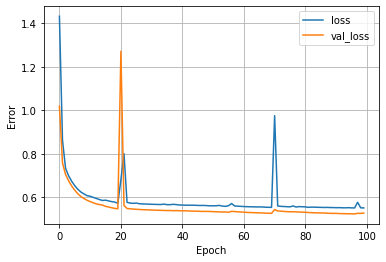

In [17]:
def plot_loss(quality):
  plt.plot(quality.history['loss'], label='loss')
  plt.plot(quality.history['val_loss'], label='val_loss')
#   plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)
plot_loss(quality)
plt.savefig('visuals/errorv2.png')

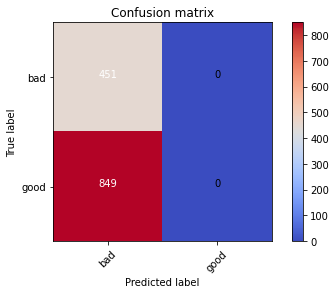

<Figure size 432x288 with 0 Axes>

In [18]:
predictions = model.predict(x=X_test, batch_size=100)
rounded_predictions = np.argmax(predictions, axis=-1)
cm = confusion_matrix(y_test,rounded_predictions)

plot_labels = ["bad","good"]

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.coolwarm)
plt.title("Confusion matrix")
plt.colorbar()
tick_marks = np.arange(len(plot_labels))
plt.xticks(tick_marks, plot_labels, rotation=45)
plt.yticks(tick_marks, plot_labels)

thresh = y_test.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
plt.savefig('visuals/cmv2.png')